In [8]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline



In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, ElasticNet, LassoCV, Lasso

import patsy

In [10]:
def pred_target(df):
    df.drop('Unnamed: 0', axis=1, inplace=True)
    X = df[[x for x in df.columns if x != 'price']]
    y = df.price.values
    target = np.log(y)
    formula = "target ~ "+' + '.join([x for x in df.columns if not x =='price'])+' -1'
    y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
    y = y.values.ravel()
    return X, y
    

In [11]:
berlin = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/Berlin_dfm.csv',
                   encoding='utf8')

In [12]:
X, y = pred_target(berlin)

In [15]:
#X.columns

In [16]:
#X.drop('level_0', axis=1, inplace = True)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [18]:
X_train.shape, X_test.shape

((10357, 25), (4439, 25))

In [19]:
linmod = LinearRegression()

In [20]:
scores = cross_val_score(linmod, X_train, y_train, cv = 10)
print scores
print np.mean(scores)
print np.std(scores)

[  4.53644973e-01   5.08123501e-01   4.82705981e-01   4.84923617e-01
  -8.78600310e+04   4.47081658e-01   4.37054371e-01   4.89230944e-01
   4.64855611e-01   4.46781129e-01]
-8785.58166318
26358.1497902


In [21]:
predictions = cross_val_predict(linmod, X_test, y_test, cv = 10) 
accuracy = metrics.r2_score(y_test, predictions)
print accuracy


0.48791427249


In [22]:
residuals = y_test - predictions
residuals

array([-0.37926697, -0.34237502, -0.28344846, ..., -0.21011141,
       -0.37565251, -0.16511622])

In [23]:
np.mean(predictions)


4.0373554877458568

In [24]:
linmod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
linmod.score(X_test, y_test)

0.47558837911398488

In [26]:
#linmod.coef_

In [27]:
print np.mean(y_train), np.mean(y_test)

4.04399721279 4.0372908186


In [28]:
# Regularization: Gridsearch an optimal ElasticNet regression

In [29]:
Xn = StandardScaler().fit_transform(X)

In [30]:
Xn_train, Xn_test, y_train, y_test = train_test_split(Xn, y, test_size = 0.3)

In [31]:
# enet_cv = ElasticNetCV(l1_ratio=np.linspace(0.01, 1., 50), n_alphas=300, cv=10, verbose=1)
# enet_cv.fit(Xn_train, y_train)


In [32]:
# print enet_cv.l1_ratio_
# print enet_cv.alpha_

In [33]:
# enet = ElasticNet(alpha= enet_cv.alpha_, l1_ratio=enet_cv.l1_ratio_)

# y_pred_enet = enet.fit(Xn_train, y_train).predict(Xn_test)
# r2_score_enet = metrics.r2_score(y_test, y_pred_enet)
# print(enet)
# print("r^2 on test data : %f" % r2_score_enet)


In [34]:
lassocv = LassoCV(n_alphas=300, cv=10)

In [35]:
lassocv.fit(Xn_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=300, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [36]:
lassocv.alpha_

0.0024705222006877608

In [37]:
lasso = Lasso(alpha=lassocv.alpha_)

y_pred_lasso = lasso.fit(Xn_train, y_train).predict(Xn_test)
r2_score_lasso = metrics.r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)


Lasso(alpha=0.0024705222006877608, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.470815


In [40]:
residuals1 = y_test - y_pred_lasso

In [39]:
lasso.fit(Xn_train, y_train)

lasso_coef = pd.DataFrame({
        'variable':X_train.columns,
        'coef':lasso.coef_,
        'abscoef':np.abs(lasso.coef_)
    })

lasso_coef.sort_values('abscoef', ascending=False, inplace=True)
lasso_coef[lasso_coef.coef != 0].head(25)


,abscoef,coef,variable
12,0.251141,-0.251141,room_type[T.Private room]
16,0.122666,0.122666,bhk
13,0.084673,-0.084673,room_type[T.Shared room]
15,0.055286,0.055286,bedrooms
14,0.035499,0.035499,bathrooms
17,0.032425,-0.032425,dist_arprt
5,0.023579,-0.023579,neighborhood[Neukolln]
7,0.020940,-0.020940,neighborhood[Reinickendorf]
18,0.017975,0.017975,host_count
2,0.011064,-0.011064,neighborhood[Lichtenberg]


In [ ]:
plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lassocv.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
#plt.plot(linmod.coef_, '--', color='navy', label='original coefficients')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()

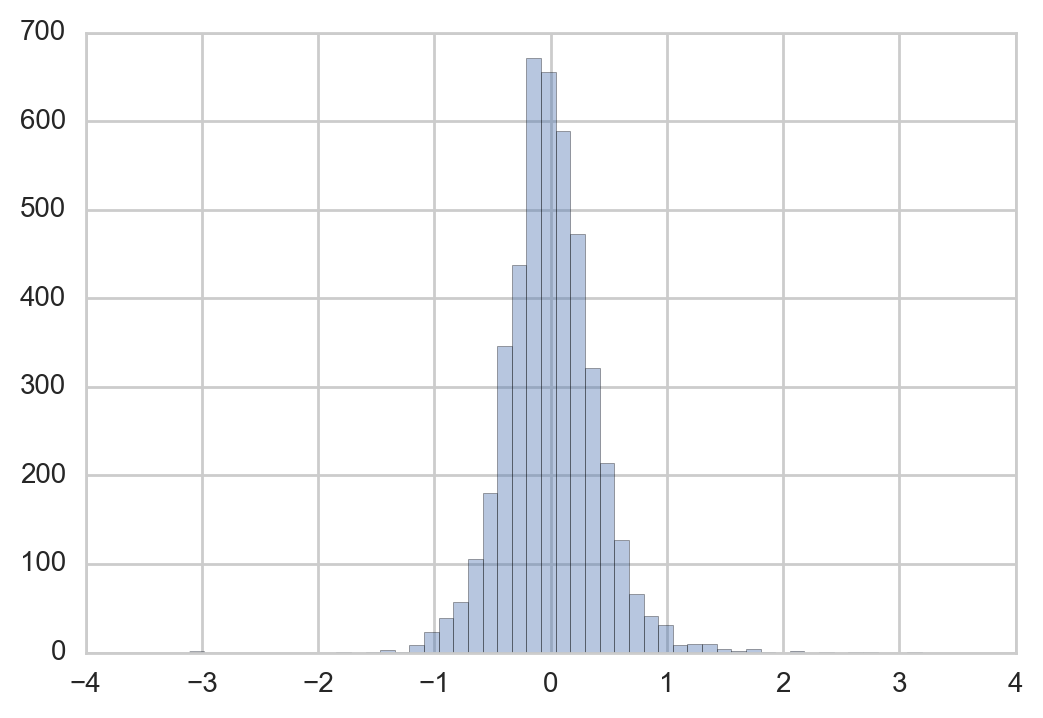

In [45]:
# plt.plot(residuals, '--', color='navy', label='original coefficients')
# plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
#           % (r2_score_lasso, r2_score_enet))
# plt.show()

sns.distplot(residuals, bins=50, kde=False)

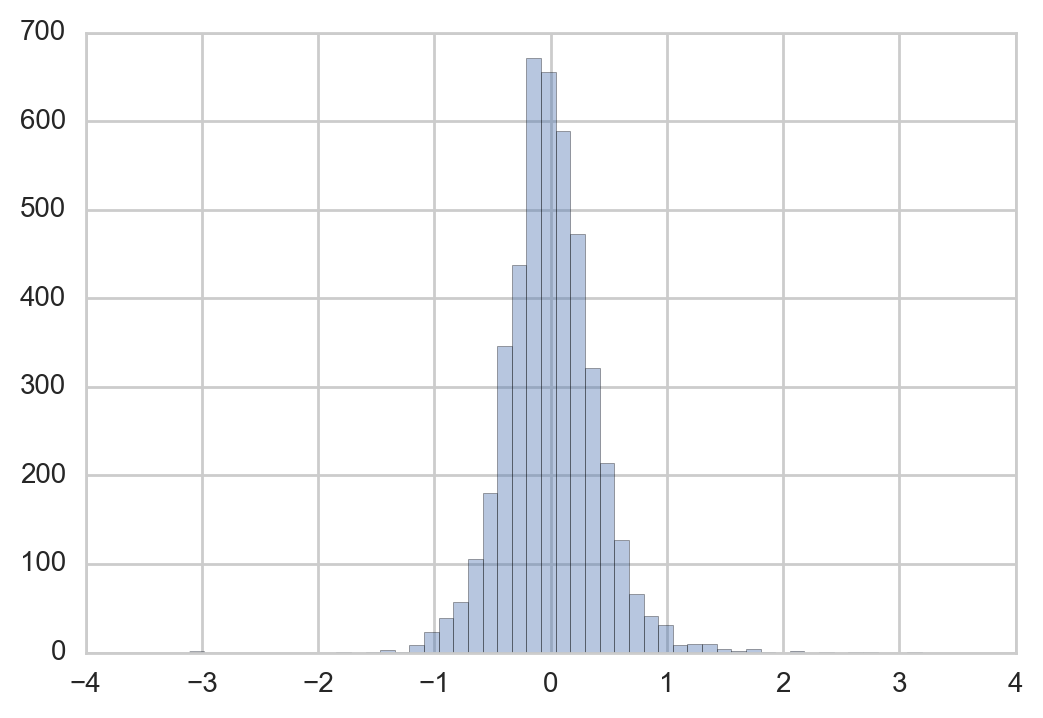

In [46]:
sns.distplot(residuals1, bins=50, kde=False)